<a href="https://colab.research.google.com/github/epadam/Machine-Learning-Tutorial-Demo-Resources/blob/master/notebooks/nlp/SST_5_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are using RNN for SST-5 dataset  sentiment analysis in the notebook.

First download the dataset and unzip the file.

In [1]:
!wget "https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip"
!unzip /content/stanfordSentimentTreebank.zip 

--2021-09-15 22:23:58--  https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6372817 (6.1M) [application/zip]
Saving to: ‘stanfordSentimentTreebank.zip’

stanfordSentimentTr 100%[===================>]   6.08M  3.35MB/s    in 1.8s    

2021-09-15 22:24:00 (3.35 MB/s) - ‘stanfordSentimentTreebank.zip’ saved [6372817/6372817]

Archive:  /content/stanfordSentimentTreebank.zip
   creating: stanfordSentimentTreebank/
  inflating: stanfordSentimentTreebank/datasetSentences.txt  
   creating: __MACOSX/
   creating: __MACOSX/stanfordSentimentTreebank/
  inflating: __MACOSX/stanfordSentimentTreebank/._datasetSentences.txt  
  inflating: stanfordSentimentTreebank/datasetSplit.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._datasetSplit.txt  
  inflating: stanfordSentimentTreebank

In [51]:
import os
import sys
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Data Preprocessing

In [3]:
out_path = os.path.join(sys.path[0], 'sst_{}.txt')

In [4]:
with open('/content/stanfordSentimentTreebank/datasetSentences.txt') as f:
  data=f.readlines()
  data = data[1:]
  for i in range(len(data)):
     _, data[i]= data[i].split('\t') 

In [5]:
with open('/content/stanfordSentimentTreebank/datasetSplit.txt') as t:
  sep = t.readlines()
sep = sep [1:]
for i in range(len(sep)):
  _, sep[i]= sep[i].split(',') 

for i in sep:
  i = int(i)

In [6]:
with open('/content/stanfordSentimentTreebank/sentiment_labels.txt') as l:
  labels = l.readlines()
labels = labels [1:]

In [7]:
len(sep)


11855

In [ ]:
train =[]
train_label =[]
test = []
test_label =[]
dev =[]
dev_label =[]
j,k,l = 0,0,0

for i in range(len(data)):
  if sep[i] == '1':
    train.append(data[i])
    train_label.append(labels[i])
  elif sep[i]=='2':
    test.append(data[i])
    test_label.append(labels[i])
  elif sep[i]=='3':
    dev.append(data[i])
    dev_label.append(labels[i])

In [ ]:
train_label[1]

'0.5\n'

Explore Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lang =[]
for k in range(len(train)):
  lang.append(len(train[k]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


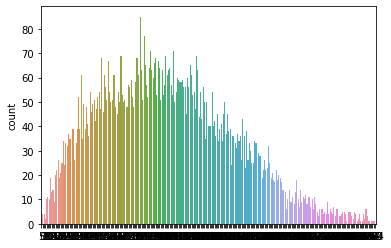

In [ ]:
sns.countplot(lang)

In [ ]:
sns.countplot(sentiment)

Vectorize the text

Build the model

In [11]:
!pip install transformers

In [14]:
!pip install datasets

In [12]:
from datasets import load_dataset

In [16]:
dataset = load_dataset('sst')
dataset

No config specified, defaulting to: sst/default
Reusing dataset sst (/root/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'tokens', 'tree'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['sentence', 'label', 'tokens', 'tree'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['sentence', 'label', 'tokens', 'tree'],
        num_rows: 2210
    })
})

In [27]:
train = dataset["train"]
validation = dataset["validation"]
test = dataset["test"]

train = train.map(lambda examples: {'labels': examples['label']}, batched=True)
validation = validation.map(lambda examples: {'labels': examples['label']}, batched=True)
test = test.map(lambda examples: {'labels': examples['label']}, batched=True)

train

Loading cached processed dataset at /root/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff/cache-120d3956b10f0239.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff/cache-532a29a93bf38d5e.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff/cache-88a21132643bfa22.arrow


Dataset({
    features: ['label', 'labels', 'sentence', 'tokens', 'tree'],
    num_rows: 8544
})

In [88]:
import re
train_text = train['sentence']
train_text = list(map(lambda e: e.lower(), train_text))
train_text = list(map(lambda x: re.sub('[^a-zA-z0-9\s]','',x), train_text))

train_labels =  train['labels']

In [90]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(train_text)
X = tokenizer.texts_to_sequences(train_text)
X = pad_sequences(X)

In [100]:
train_text[3]

'you d think by now america would have had enough of plucky british eccentrics with hearts of gold '

In [53]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


In [91]:
Y = np.array(train_labels)

In [92]:
Y = np.reshape(Y, (-1, 1))

In [93]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(max_fatures, input_length = X.shape[1], output_dim=128))

model.add(SpatialDropout1D(0.4))
# Add a LSTM layer with 128 internal units.
model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(1,activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 44, 128)           256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 44, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 197       
Total params: 510,997
Trainable params: 510,997
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss = 'mean_squared_error', optimizer='adam',metrics = ['accuracy'])

In [75]:
len(train_labels)

8544

In [95]:
batch_size = 32
model.fit(X, Y, epochs = 2, batch_size=batch_size, verbose = 2)

Epoch 1/2
267/267 - 66s - loss: 0.3032 - accuracy: 0.0025
Epoch 2/2
267/267 - 64s - loss: 0.3032 - accuracy: 0.0025


In [97]:
twt = ['Meetings: Because none of us is as dumb as all of us.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]

print(sentiment)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 152
  544   4  86   6  11 542  11  35   4  86]]
1/1 - 0s
[1.]
